In [ ]:
import numpy as np
import cv2
import os
from PIL import Image
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pasta = '/content/drive/MyDrive/Datasets/imagens_celulas_1000/' # Adaptado para o meu drive

positivas = os.listdir(pasta + 'positivos/')

negativas = os.listdir(pasta + 'negativos/')

In [ ]:
dataset = list()

label = list()

SIZE = 64

for i, image_name in enumerate(positivas):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(pasta + 'positivos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)

for i, image_name in enumerate(negativas):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(pasta + 'negativos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)


label =  0
imagem


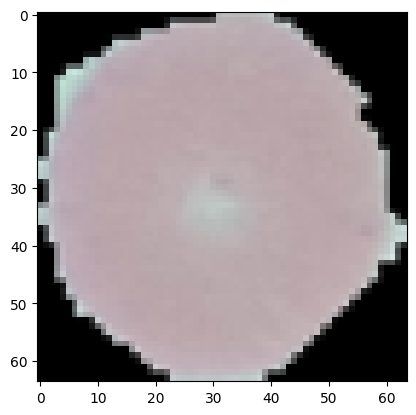

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[-1])

print('imagem')
plt.imshow(dataset[-1])

In [ ]:
X = np.array(dataset)

X = X/255.0

y = tf.keras.utils.to_categorical(np.array(label))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



In [ ]:
print(np.shape(X_train))

print(np.shape(y_train))

(1600, 64, 64, 3)
(1600, 2)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LeakyReLU

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_170 (Conv2D)         (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_164 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_171 (Conv2D)         (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_165 (MaxPooli  (None, 16, 16, 64)       0         
 ng2D)                                               

In [ ]:
from tensorflow import keras
history = model.fit(X_train, y_train, batch_size = 32, verbose = 1, epochs = 30, validation_split = 0.1 )

Epoch 1/30
45/45 [==============================] - 3s 13ms/step - loss: 0.6734 - accuracy: 0.5569 - val_loss: 0.5850 - val_accuracy: 0.6125
Epoch 2/30
45/45 [==============================] - 0s 8ms/step - loss: 0.6057 - accuracy: 0.6604 - val_loss: 0.5204 - val_accuracy: 0.6500
Epoch 3/30
45/45 [==============================] - 0s 7ms/step - loss: 0.5507 - accuracy: 0.7188 - val_loss: 0.4459 - val_accuracy: 0.7875
Epoch 4/30
45/45 [==============================] - 0s 8ms/step - loss: 0.4369 - accuracy: 0.7993 - val_loss: 0.3155 - val_accuracy: 0.8687
Epoch 5/30
45/45 [==============================] - 0s 8ms/step - loss: 0.2361 - accuracy: 0.9139 - val_loss: 0.2308 - val_accuracy: 0.9375
Epoch 6/30
45/45 [==============================] - 0s 8ms/step - loss: 0.1417 - accuracy: 0.9500 - val_loss: 0.1344 - val_accuracy: 0.9500
Epoch 7/30
45/45 [==============================] - 0s 8ms/step - loss: 0.1334 - accuracy: 0.9583 - val_loss: 0.2276 - val_accuracy: 0.9438
Epoch 8/30
45/45 [=

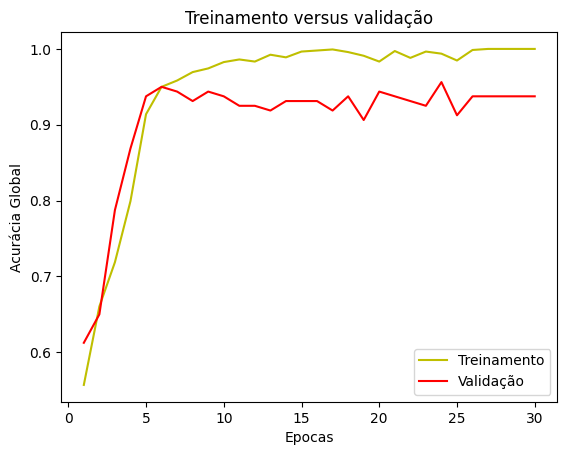

In [ ]:
#plotar gráficos
import matplotlib.pyplot as plt

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Acurácia Global")
plt.legend()
plt.show()

In [ ]:
model.save('malaria_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('malaria_model.h5')

In [ ]:
_,score = model.evaluate(X_test, y_test)

print(score)

13/13 [==============================] - 0s 5ms/step - loss: 0.2798 - accuracy: 0.9625
0.9624999761581421
